## Ridge Regression: regularised linear regression
Regularisatipon is done explicitly by including the sqaure l2 norm of theta(coeff_matrix) in the cost function to decrease overfitting. I'll be using the sklearn library for implementing it.

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, LinearRegression

data:  [[-1.28606819]
 [ 1.38083004]
 [-1.3322359 ]
 [ 2.7344742 ]
 [ 0.56881976]
 [ 0.61612648]
 [-2.82711978]
 [-0.55797971]
 [-2.82039027]
 [-2.74394959]
 [ 2.6190576 ]
 [-2.64536676]
 [ 0.0213555 ]
 [ 1.84628902]
 [-1.82991795]
 [ 0.49025868]
 [ 2.56659137]
 [-2.60512525]
 [ 2.25992145]
 [-0.07142582]
 [ 2.54759223]
 [ 2.70112087]
 [ 2.60400954]
 [ 1.03931472]
 [ 2.42883937]
 [-2.55846138]
 [ 0.60071767]
 [-2.47428636]
 [-0.54750838]
 [-0.74390044]
 [-0.62293242]
 [-1.85947376]
 [ 1.73794313]
 [ 0.64966406]
 [-2.0266447 ]
 [ 1.66560435]
 [-2.83200044]
 [ 0.73390026]
 [ 2.95368573]
 [ 0.97473426]
 [-0.65467195]
 [ 2.29156409]
 [ 1.60200405]
 [-0.30484057]
 [-1.81674622]
 [ 2.91917259]
 [ 2.33502186]
 [ 1.61776277]
 [ 2.96180852]
 [-0.95036699]
 [ 1.53593132]
 [-1.05502716]
 [ 0.54592983]
 [ 2.59465697]
 [ 1.15869074]
 [-2.29198281]
 [ 1.19148875]
 [-0.8707597 ]
 [ 2.04423746]
 [ 2.79860951]
 [ 0.16563208]
 [-1.3602712 ]
 [-1.51214975]
 [ 0.2226978 ]
 [-0.67101739]
 [ 1.30413661]
 [-

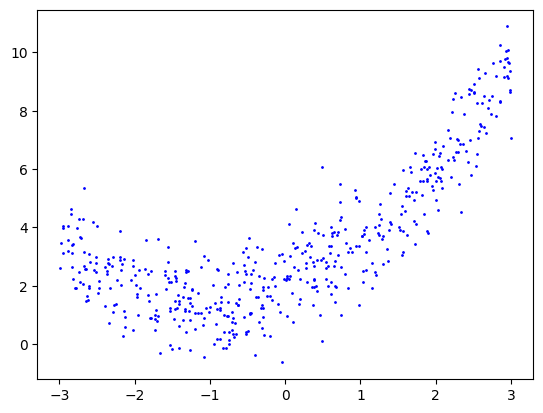

In [117]:
data1 = 6 * np.random.rand(500, 1) - 3
target1 = 0.5 * data1**2 + data1 + 2 + np.random.randn(500, 1)

plt.scatter(data1, target1, c='b', s=1)
print("data: ",data1)
print("target: ",target1)

In [118]:
for i in range(2,8):
    data1_x=data1[:,0]**i#its a column vector right now needs to be reshaped before being inserted to data1
    data1=np.insert(data1,1,data1_x.reshape(1,-1),axis=1)
data1.shape, data1

((500, 7),
 array([[-1.28606819e+00, -5.81899502e+00,  4.52463956e+00, ...,
          2.73562140e+00, -2.12712001e+00,  1.65397140e+00],
        [ 1.38083004e+00,  9.57153470e+00,  6.93172545e+00, ...,
          3.63547282e+00,  2.63281702e+00,  1.90669159e+00],
        [-1.33223590e+00, -7.44848471e+00,  5.59096531e+00, ...,
          3.15010139e+00, -2.36452222e+00,  1.77485250e+00],
        ...,
        [-1.69453129e-01, -4.01187281e-06,  2.36754129e-05, ...,
          8.24514647e-04, -4.86573868e-03,  2.87143631e-02],
        [-2.59346016e+00, -7.89145463e+02,  3.04282856e+02, ...,
          4.52395548e+01, -1.74437053e+01,  6.72603559e+00],
        [ 1.72451812e+00,  4.53601338e+01,  2.63030776e+01, ...,
          8.84445434e+00,  5.12865261e+00,  2.97396273e+00]]))

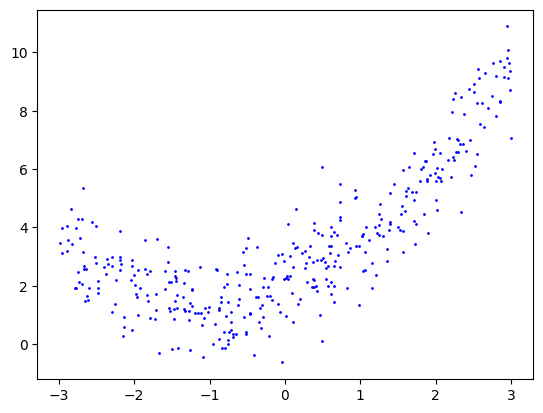

In [119]:
X_train, X_test, Y_train, Y_test= train_test_split(data1, target1)
plt.scatter(X_train[:,0], Y_train, c='b', s=1)
plt.show()

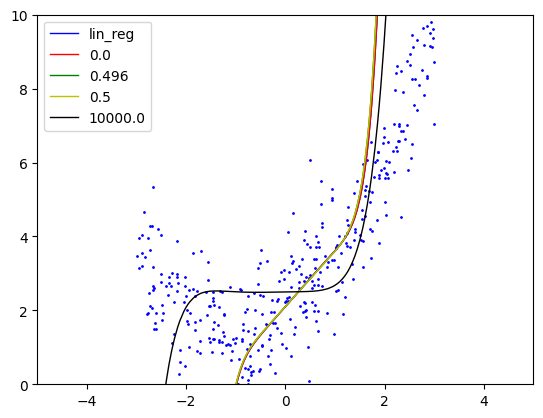

In [125]:
plt.scatter(X_train[:,0], Y_train, color='b',s=1)
plt.axis([-5,5,0,10])
c=['r','g','y','k']
X_train1=np.sort(X_train[:,0], axis=0)
X_train1=X_train1.reshape(375,1)
alg1=LinearRegression()
alg1.fit(X_train, Y_train)
lin_coeff=alg1.coef_
lin_intercept=alg1.intercept_
Y=np.full((375,1), lin_intercept)
for j in range(0,7):
        Y=Y+lin_coeff[0][j]*(X_train1)**(j+1)
plt.plot(X_train1,Y, color='b', linewidth=1, label='lin_reg')

alphas=np.array([0.0,.496,.5, 10000])
for i in range(4):
    alg_ridge1=Ridge(alpha=alphas[i], solver="cholesky")
    """
    solver ='lsqr' means that the model will use RMSE minimising gradient descent along with the L2 norm term
    """
    
    alg_ridge1.fit(X_train, Y_train)
    coeff_=alg_ridge1.coef_
    intercept=alg_ridge1.intercept_
    Y=np.full((375,1), intercept)
    
    for j in range(0,7):
        Y=Y+coeff_[0][j]*(X_train1)**(j+1)
    plt.plot(X_train1,Y, color=c[i], linewidth=1, label=alphas[i])
    
plt.legend()
plt.show()